In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for charts
sns.set(style='whitegrid')

file_path = '../data/mission_hospital.xlsx'  # Your local file path
xls = pd.ExcelFile(file_path)

# Check available sheet names
print(xls.sheet_names)


['Copyright @ IIMB', 'Data Description', 'MH-Raw Data', 'MH-Modified Data', 'Sheet1']


In [33]:
df = xls.parse('MH-Modified Data')

# Thorough column cleanup
import re

df.columns = (
    df.columns
    .str.strip()                                 # remove leading/trailing whitespace
    .str.replace('\u00a0', ' ', regex=False)     # non-breaking space → space
    .str.replace('–', '-', regex=False)          # en dash → dash
    .str.replace('—', '-', regex=False)          # em dash → dash
    .str.replace(' +', ' ', regex=True)          # multiple spaces → single space
    .str.replace(r'\s*-\s*', '-', regex=True)     # space(s) around dashes → remove
)



In [34]:
#What it shows: Mean, std, min, max, percentiles for each numeric column, this helps spot outliers and skewness
df.describe()


,SL.,AGE,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,...,TRANSFERRED,ALERT,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY-ICU,LENGTH OF STAY-WARD,IMPLANT,COST OF IMPLANT
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,124.500000,28.879837,0.330645,0.564516,0.076613,0.108871,0.008065,0.096774,0.004032,0.060484,...,0.016129,0.995968,0.870968,198723.330282,12.062084,11.612903,3.475806,8.153226,0.197581,8544.201613
std,71.735626,25.899359,0.471397,0.496823,0.266514,0.312107,0.089621,0.296248,0.063500,0.238863,...,0.126227,0.063500,0.335914,122587.492984,0.505390,5.392617,3.853520,3.755793,0.398979,21521.877503
min,1.000000,0.032877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,46093.000000,10.738416,3.000000,0.000000,0.000000,0.000000,0.000000
25%,62.750000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,131652.750000,11.787923,8.000000,1.000000,6.000000,0.000000,0.000000
50%,124.500000,15.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,162660.500000,11.999419,10.000000,2.000000,7.000000,0.000000,0.000000
75%,186.250000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,220614.000000,12.304170,13.000000,4.000000,10.000000,0.000000,0.000000
max,248.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,887350.000000,13.695995,41.000000,30.000000,22.000000,1.000000,196848.000000


In [35]:
#Some columns may have missing values, so need to drop them, impute them, and potentially figure out why 
df.isnull().sum().sort_values(ascending=False)

PAST MEDICAL HISTORY CODE       173
KEY COMPLAINTS-CODE              36
CREATININE                       33
BP-LOW                           23
BP-HIGH                          23
UREA                             13
HB                                2
TRANSFERRED                       0
hypertension1                     0
hypertension2                     0
hypertension3                     0
other                             0
MODE OF ARRIVAL                   0
AMBULANCE                         0
SL.                               0
Diabetes2                         0
ALERT                             0
TYPE OF ADMSN                     0
ELECTIVE                          0
TOTAL COST TO HOSPITAL            0
Ln(Total Cost)                    0
TOTAL LENGTH OF STAY              0
LENGTH OF STAY-ICU                0
LENGTH OF STAY-WARD               0
IMPLANT USED (Y/N)                0
IMPLANT                           0
STATE AT THE TIME OF ARRIVAL      0
RR                          

In [ ]:
#impute


#for numerical columns. use median because it's less sensitive to outliers than mean
num_cols = ['CREATININE', 'UREA', 'BP-LOW', 'BP-HIGH', 'HB']
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)


#for categorical columns. just fill with unknown
cat_cols = ['PAST MEDICAL HISTORY CODE', 'KEY COMPLAINTS-CODE']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')



['SL.', 'AGE', 'GENDER', 'MALE', 'MARITAL STATUS', 'UNMARRIED', 'KEY COMPLAINTS-CODE', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD', 'CAD-VSD', 'OS-ASD', 'other-heart', 'other-respiratory', 'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD', 'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP-HIGH', 'BP-LOW', 'RR', 'PAST MEDICAL HISTORY CODE', 'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2', 'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'MODE OF ARRIVAL', 'AMBULANCE', 'TRANSFERRED', 'STATE AT THE TIME OF ARRIVAL', 'ALERT', 'TYPE OF ADMSN', 'ELECTIVE', 'TOTAL COST TO HOSPITAL', 'Ln(Total Cost)', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY-ICU', 'LENGTH OF STAY-WARD', 'IMPLANT USED (Y/N)', 'IMPLANT', 'COST OF IMPLANT']


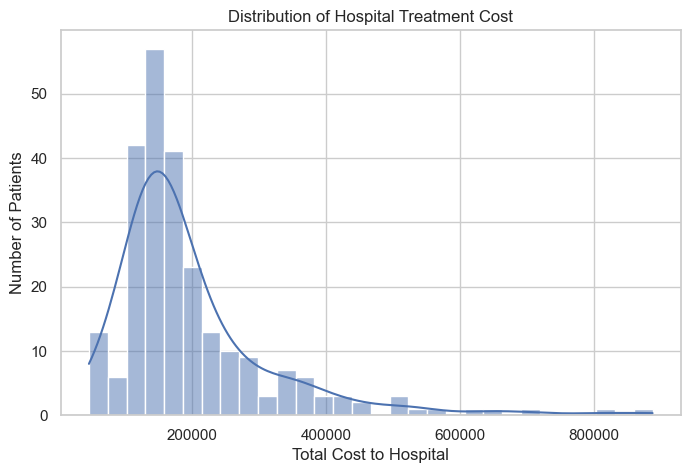

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TOTAL COST TO HOSPITAL'], kde=True)
plt.title('Distribution of Hospital Treatment Cost')
plt.xlabel('Total Cost to Hospital')
plt.ylabel('Number of Patients')
plt.show()



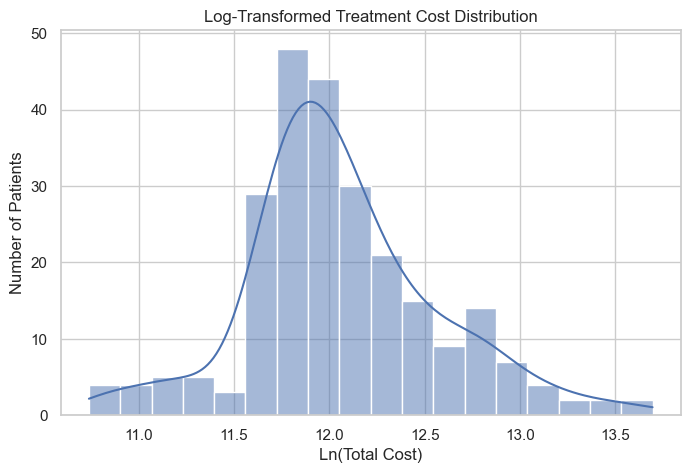

In [40]:
import numpy as np

# Add a log-transformed column if not already there
df['Ln(Total Cost)'] = np.log(df['TOTAL COST TO HOSPITAL'] + 1)

plt.figure(figsize=(8, 5))
sns.histplot(df['Ln(Total Cost)'], kde=True)
plt.title('Log-Transformed Treatment Cost Distribution')
plt.xlabel('Ln(Total Cost)')
plt.ylabel('Number of Patients')
plt.show()
